In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import signal

### Question 5 c)

In [60]:
#Analytical DFT of non integer sine wave
i = np.complex(0,1)
def ftsin(k,N):
    K = np.arange(N)
    k1 = K-k
    k2 = K+k
    a = (1-np.exp(-2*np.pi*i*k1))/(1-np.exp(-2*np.pi*i*k1/N))
    b = (1-np.exp(-2*np.pi*i*k2))/(1-np.exp(-2*np.pi*i*k2/N))
    f = (1/(2*i))*(a-b)
    return (f/len(f)).real

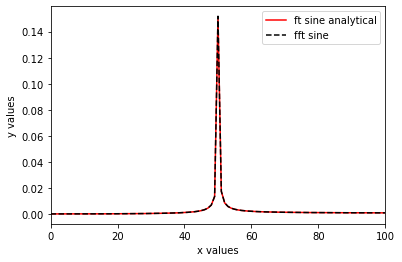

In [102]:
x = np.linspace(-10,10,500)
k = 50.1
N = len(x)
ft = ftsin(k,N)
dx = x[1]-x[0]
f = np.linspace(0,N/dx,N)

s = np.sin(2*np.pi*k*x/N/dx)
sinfft = (np.fft.fft(s)/len(s)).real #Normalized

plt.plot(abs(ft),color='red',label='ft sine analytical')
plt.plot(abs(sinfft),'--',color='black',label='fft sine')
plt.xlim(0,100)
plt.xlabel('x values')
plt.ylabel('y values')
plt.savefig('q5_sine_3')
plt.legend(loc='upper right')
plt.show()

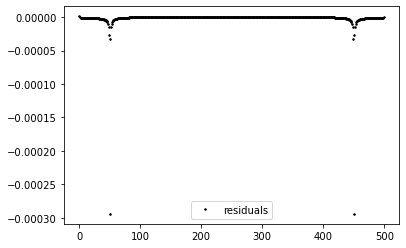

In [104]:
#Residuals
plt.plot(abs(ft)-abs(sinfft),'.',color='black',markersize=3,label='residuals')
plt.legend()
plt.show()

### Question 5 d)

In [ ]:
#Define window function
def window(x,N):
    0.5-0.5*np.cos(2*np.pi*x/N)